Se pasa a trabajar con R por sus capacidades de aplicaciones no supervisadas.

se empieza el análisis de Factores de Datos Mixtos para ver las variables más importantes

In [1]:
install.packages(c("FactoMineR", "factoextra"))

Installing packages into 'C:/Users/Juan Pablo Saenz P/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Juan Pablo Saenz P\AppData\Local\Temp\RtmpCgmAcK\downloaded_packages


In [2]:
IRkernel::installspec()

In [3]:
library("cluster")
library("FactoMineR")
library("factoextra")
library('dplyr')

Warning message:
"package 'FactoMineR' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
usuario_df <- read.csv(file = 'full_dataset.csv')

usuario_df <- as.data.frame(unclass(usuario_df),                     
                       stringsAsFactors = TRUE)

head(usuario_df[,-1], 4)

,ActualizaciÃ³n.datos,Agendamiento.citas,InformaciÃ³n.general,Peticiones.y.quejas,Procesos.web,Tipo_persona,Departamento,Tiene_plan_avanzado,Tipo_Plan,Es_moroso,...,Edad,Estrato,Motivo_llamada,Duracion_llamada,Tiempo_en_espera,Transferencia_llamada,primera_llamada,Antiguedad,Recomienda_marca,y
,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
1,0,0,0,0,2,soltero,santafÃ© de bogotÃ¡,si,b,no,...,26,2-3,m20,171.00181,9.819738,si,si,legend,no,0
2,0,0,0,2,0,soltero,santafÃ© de bogotÃ¡,no,f,no,...,31,1,m17,114.57671,35.964408,no,no,legend,si,0
3,0,0,0,0,2,soltero,exterior,no,d,si,...,19,2-3,m9,29.70421,27.058203,no,no,legend,si,0
4,0,2,0,0,0,/casado.,antioquia,no,b,no,...,29,1,m32,211.63007,34.726243,no,no,young,si,0


In [6]:
famd <- FAMD(usuario_df[,-1], graph = FALSE)

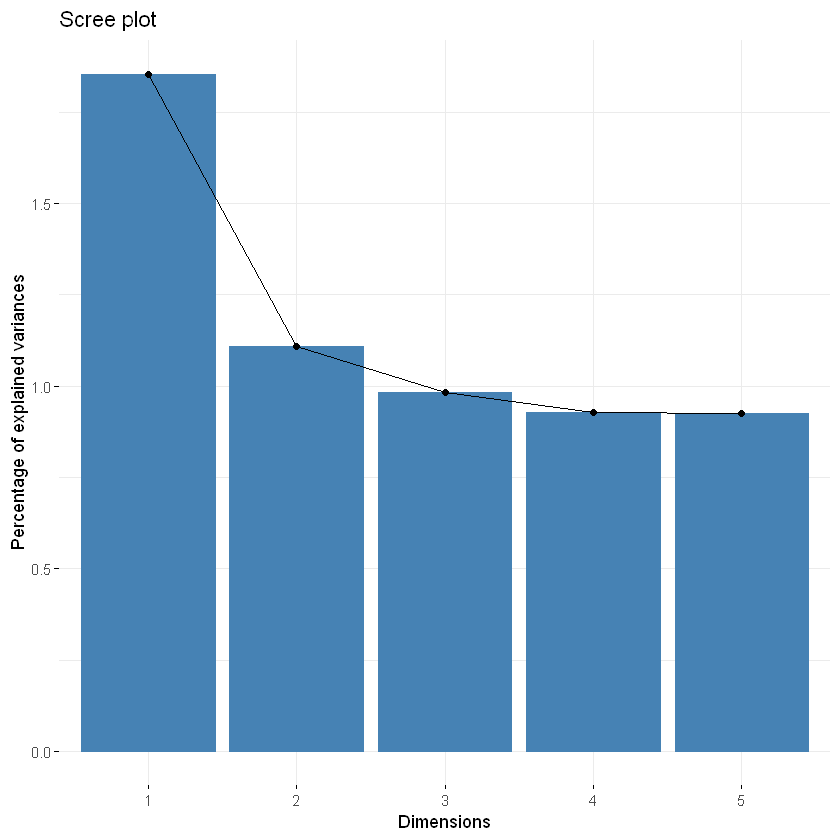

In [7]:
fviz_screeplot(famd)

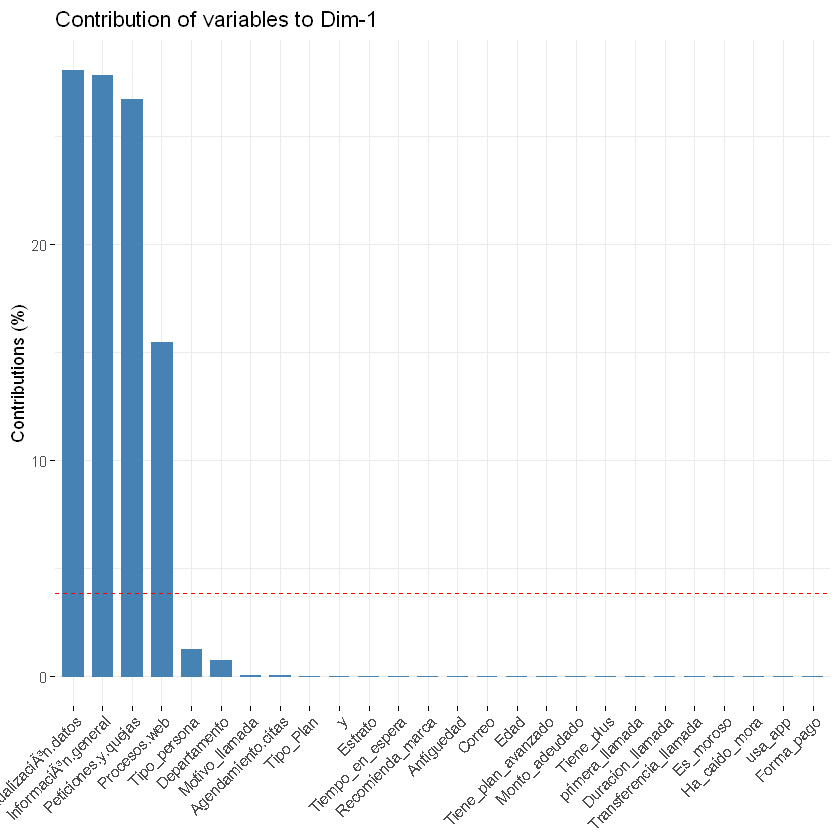

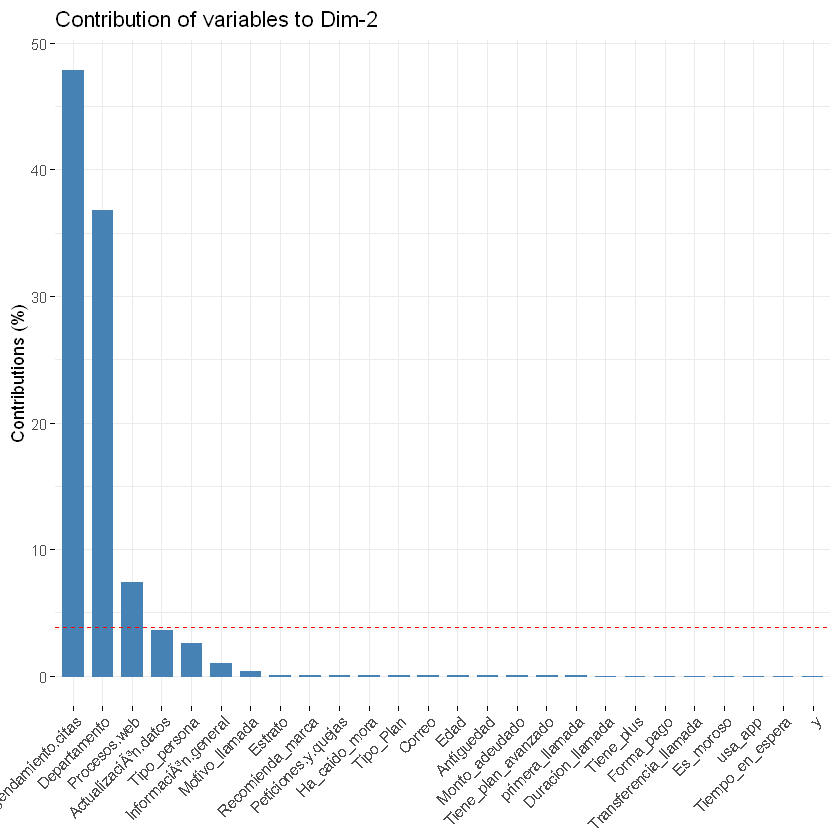

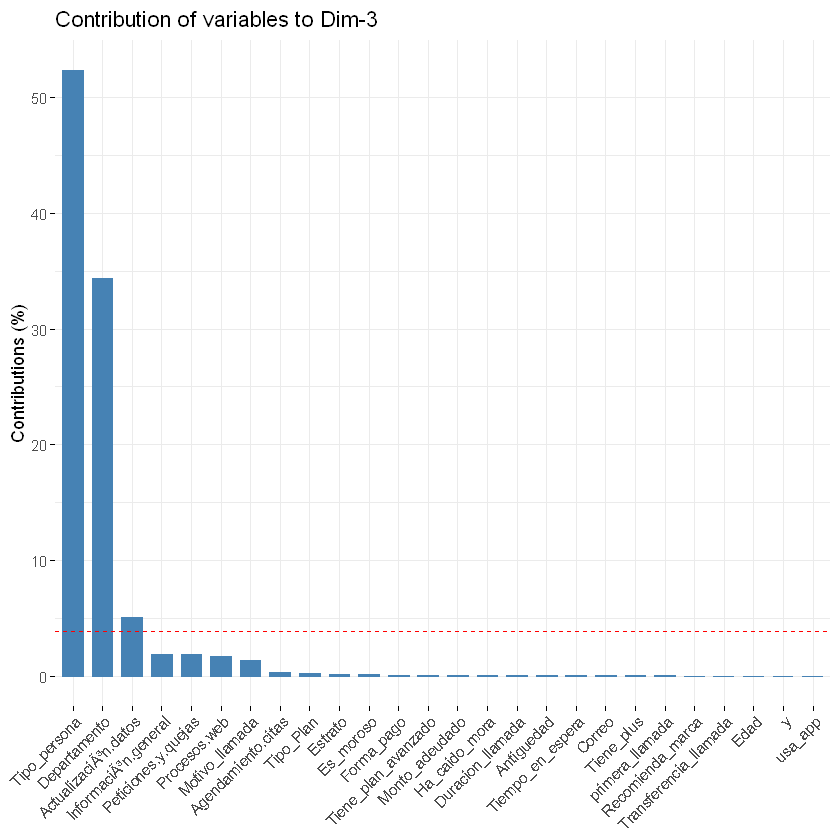

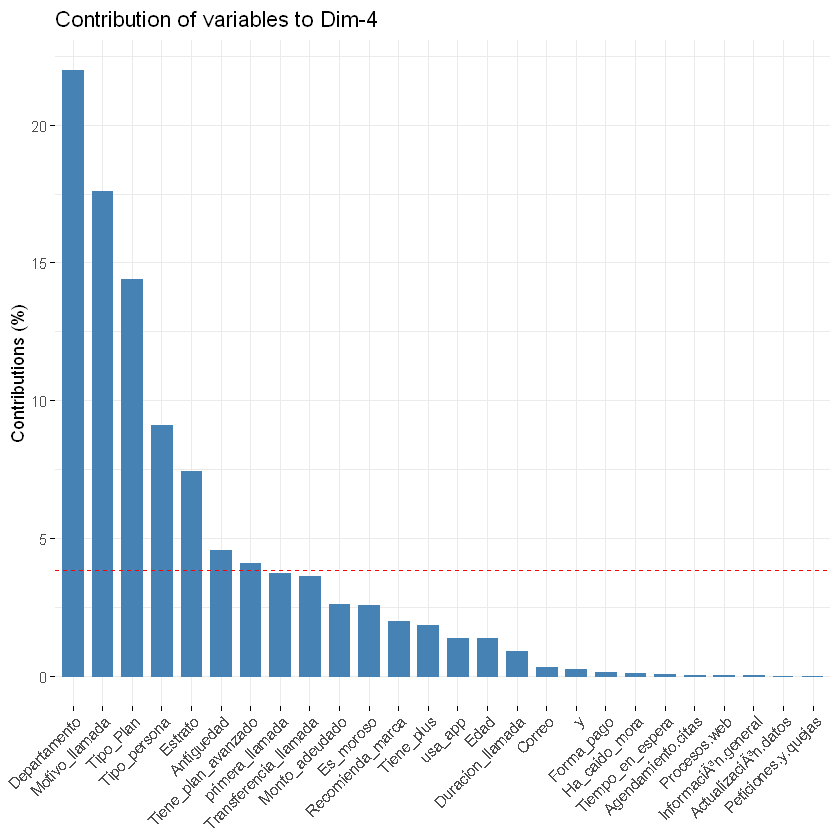

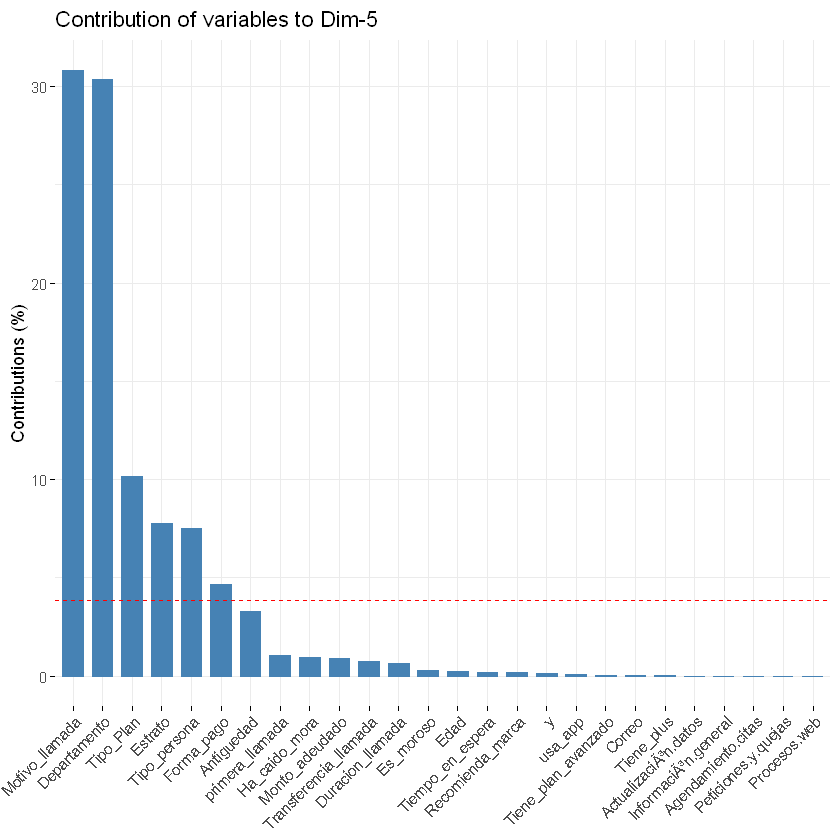

In [8]:
var <- get_famd_var(famd)
fviz_contrib(famd, "var", axes = 1) #actualizacion, informacion general, peticiones y quejas, procesos web
fviz_contrib(famd, "var", axes = 2) #Agentamiento citas, Departamento
fviz_contrib(famd, "var", axes = 3) #tipo de persona, 
fviz_contrib(famd, "var", axes = 4) #tipo de plan, tipo de persona, estrato, antiguedad
fviz_contrib(famd, "var", axes = 5) #motivo de llamada, forma de pago

Observando las contribuciones se descartan hasta 11 variables que no aportan a la variabilidad.

In [9]:
variables=c('Actualización.datos', 'Agendamiento.citas','Información.general',	
            'Peticiones.y.quejas', 'Procesos.web',
            'Tipo_Plan', 'Tipo_persona','Antiguedad', 'Motivo_llamada',
            'Forma_pago')

Tomamos una muestra y obtenemos la distancia de gower para encontrar los usuarios más similares

In [10]:
d1 <- daisy(usuario_df[1:10000,-c(1,25)],
            metric='gower',
            type = list(logratio = 3))

Warning message in daisy(usuario_df[1:10000, -c(1, 25)], metric = "gower", type = list(logratio = 3)):
"binary variable(s) 25 treated as interval scaled"


Aplicamos clustering jerarquico

In [11]:
hc <- hclust(d1, method = "complete")

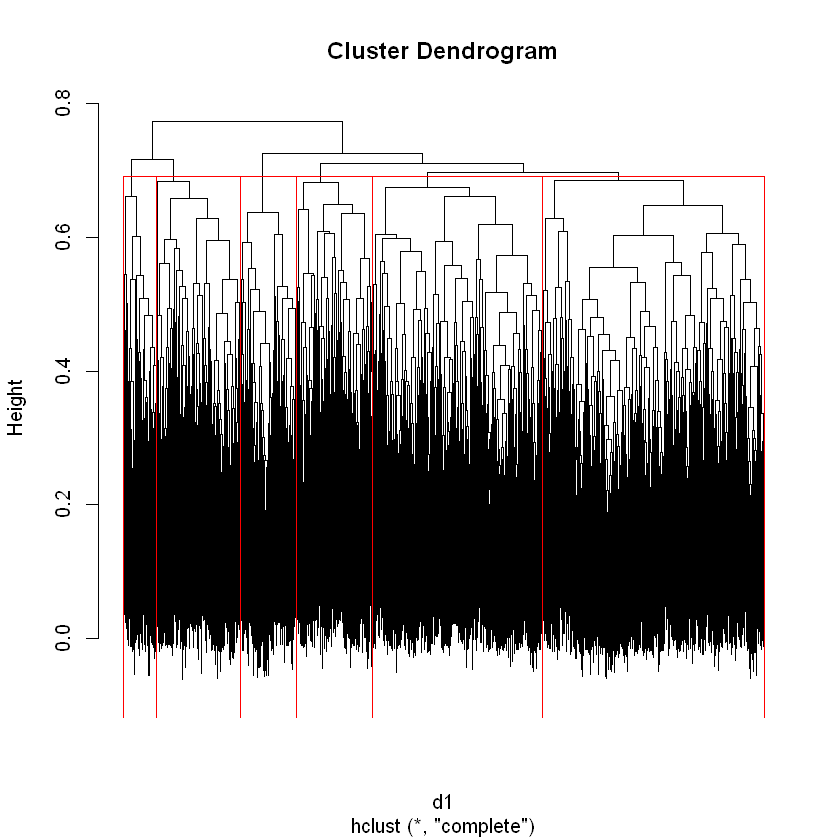

In [12]:
plot(hc, labels=FALSE)
rect.hclust(hc, k=6, border="red")

In [14]:
cluster <- cutree(hc, k=6)

In [15]:
usuario_df <- cbind(usuario_df[1:10000,],as.factor(cluster))